# Importing Libraries for Visualization and Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s5e8/train.csv') #Load the Dataset

# Basic Information About Dataset

In [240]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [243]:
df.isna().sum() #Counts Null values for each column

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Finding all Unique entries for each column**

In [244]:
df['job'].unique()

array(['technician', 'blue-collar', 'student', 'admin.', 'management',
       'entrepreneur', 'self-employed', 'unknown', 'services', 'retired',
       'housemaid', 'unemployed'], dtype=object)

In [245]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [246]:
df['education'].unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

In [247]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [248]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [249]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [250]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [251]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [252]:
df['y'].unique()

array([0, 1])

 **Grouping the Dataset based on Job, Education and Marital Status for identify patterns**

In [253]:
Cat=df[df['y']==1].groupby(['job','marital','education']).count()

In [254]:
Cat['y'].head(15) #shows first 15 entries of the table

job          marital   education
admin.       divorced  primary        36
                       secondary    1059
                       tertiary       93
                       unknown        29
             married   primary        96
                       secondary    4118
                       tertiary      463
                       unknown       127
             single    primary        13
                       secondary    2685
                       tertiary      720
                       unknown        51
blue-collar  divorced  primary       296
                       secondary     417
                       tertiary        7
Name: y, dtype: int64

# Data Visualization

<Axes: xlabel='count', ylabel='job'>

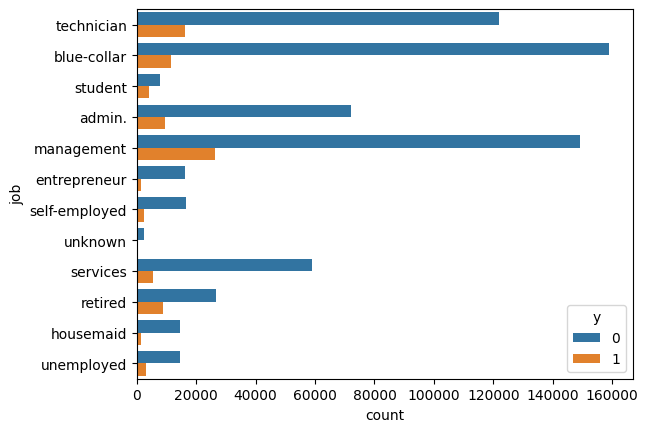

In [255]:
sns.countplot(y=df['job'],hue=df['y']) #Shows the count of Prediction Variable for each Job Type

<Axes: xlabel='count', ylabel='marital'>

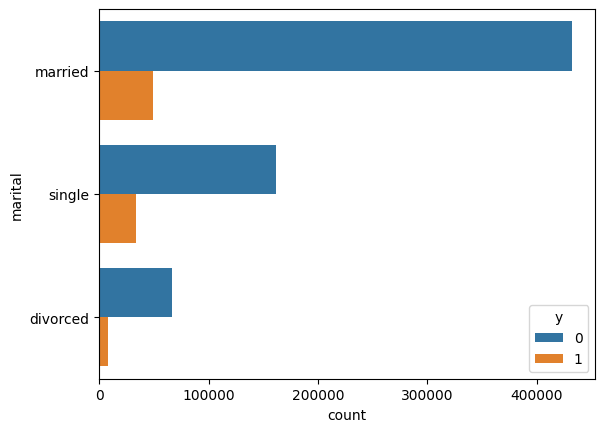

In [256]:
sns.countplot(y=df['marital'],hue=df['y']) #Shows the count of Prediction Variable for each Marital Type

<Axes: xlabel='count', ylabel='education'>

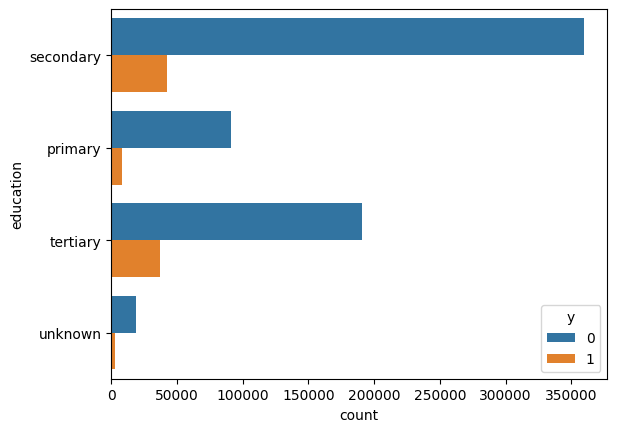

In [257]:
sns.countplot(y=df['education'],hue=df['y']) #Shows the count of Prediction Variable for each Education Type

# Feature Extraction 
Mapping the Categorical Features to draw correlation between Prediction Variable and Features.

In [16]:
job_mapping={'technician':11,'blue-collar':1,'student':2,'admin.':3,'management':4,
       'entrepreneur':5, 'self-employed':6, 'unknown':0, 'services':7, 'retired':8,
       'housemaid':9, 'unemployed':10}
marital_mapping={'married':1, 'single':0, 'divorced':2}
education_mapping={'secondary':2, 'primary':1, 'tertiary':3, 'unknown':0}
default_mapping={'no':0, 'yes':1}
housing_mapping={'no':0, 'yes':1}
loan_mapping={'no':0, 'yes':1}
contact_mapping={'cellular':1, 'unknown':0, 'telephone':2}
poutcome_mapping={'unknown':0, 'other':3, 'failure':2, 'success':1}
month_mapping={'aug':8,'jun':6,'may':5,'feb':2,'apr':4,'nov':11,'jul':7,'jan':1,'oct':10,
       'mar':3, 'sep':9, 'dec':12}
df['job']=df['job'].map(job_mapping)
df['marital']=df['marital'].map(marital_mapping)
df['education']=df['education'].map(education_mapping)
df['default']=df['default'].map(default_mapping)
df['housing']=df['housing'].map(housing_mapping)
df['loan']=df['loan'].map(loan_mapping)
df['contact']=df['contact'].map(contact_mapping)
df['poutcome']=df['poutcome'].map(poutcome_mapping)
df['month']=df['month'].map(month_mapping)

<Axes: >

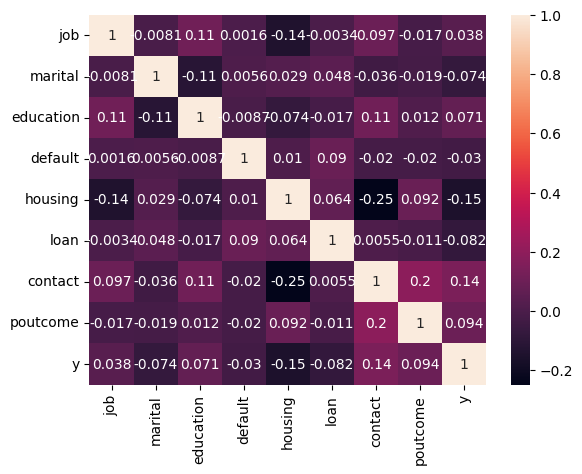

In [20]:
Q1=df[['job','marital','education','default','housing','loan','contact','poutcome','y']]
sns.heatmap(Q1.corr(),annot=True)

<Axes: >

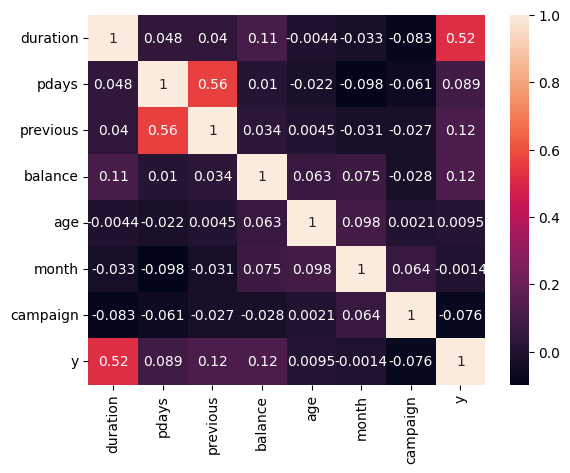

In [23]:
Q2=df[['duration','pdays','previous','balance','age','month','campaign','y']]
sns.heatmap(Q2.corr(),annot=True)

# Model Training and Testing

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
Y=df['y'] #defining the Prediction Variable
X=df[['duration','pdays','previous','contact','loan','default']] #Defining the features for Model Testing based on Correlation Values 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=2529)


# Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr=model.predict(X_test)

In [30]:

classification_report(y_test,y_pred_lr)

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94    197896\n           1       0.62      0.33      0.43     27104\n\n    accuracy                           0.89    225000\n   macro avg       0.77      0.65      0.69    225000\nweighted avg       0.88      0.89      0.88    225000\n'

In [31]:
confusion_matrix(y_test,y_pred_lr)

array([[192438,   5458],
       [ 18212,   8892]])

In [32]:
accuracy_score(y_test,y_pred_lr)*100

89.48

# Decision Tree

In [36]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_leaf=2, min_samples_split=10,random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)

In [37]:
classification_report(y_test,y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.95    197896\n           1       0.72      0.45      0.56     27104\n\n    accuracy                           0.91    225000\n   macro avg       0.82      0.71      0.75    225000\nweighted avg       0.90      0.91      0.90    225000\n'

In [38]:
confusion_matrix(y_test,y_pred_dt)

array([[193082,   4814],
       [ 14829,  12275]])

In [39]:
accuracy_score(y_test,y_pred_dt)*100

91.26977777777779

# XGBoost Classifier

In [40]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=200,
    learning_rate=0.2
)
xgb_model.fit(X_train, y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [41]:
classification_report(y_test,y_pred_xgb)

'              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.95    197896\n           1       0.72      0.46      0.56     27104\n\n    accuracy                           0.91    225000\n   macro avg       0.82      0.72      0.76    225000\nweighted avg       0.90      0.91      0.90    225000\n'

In [42]:
confusion_matrix(y_test,y_pred_xgb)

array([[193026,   4870],
       [ 14703,  12401]])

In [43]:
accuracy_score(y_test,y_pred_xgb)*100

91.30088888888889

# CatBoost Classifier

In [47]:
cat_classifier = CatBoostClassifier(
    iterations=200,   
    learning_rate=0.2,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=False
)
cat_classifier.fit(X_train, y_train)
y_pred_cat = cat_classifier.predict(X_test)
y_pred_proba_cat = cat_classifier.predict_proba(X_test)[:, 1]

In [49]:
classification_report(y_test,y_pred_cat)

'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95    197896\n           1       0.71      0.47      0.57     27104\n\n    accuracy                           0.91    225000\n   macro avg       0.82      0.72      0.76    225000\nweighted avg       0.90      0.91      0.91    225000\n'

In [50]:
confusion_matrix(y_test,y_pred_cat)

array([[192684,   5212],
       [ 14268,  12836]])

In [52]:
accuracy_score(y_test, y_pred_cat)*100

91.34222222222222